In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm import tqdm
import seaborn as sns
sns.set_palette('hls', 10)

In [2]:
def image_to_np(path):
    im = Image.open(path)
    im_np = np.asarray(im)
    try:
        im_np = im_np[:, :, 0]
    except IndexError:
        pass
    im_np = np.where(im_np<1, -1, 1)
    im_np = im_np.reshape(N)
    return im_np

In [3]:
PATH = '../data/digits/'

In [4]:
N = 50*50
P = 5
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_ITERATIONS = 9
NO_OF_BITS_TO_CHANGE = 500

In [5]:
epsilon = np.asarray([image_to_np(os.path.join(PATH, '50x50_panda.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_v.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_perro.bmp')),
#                      image_to_np(os.path.join(PATH, '50x50_paloma.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_quijote.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_torero.bmp'))
                     ])
                    

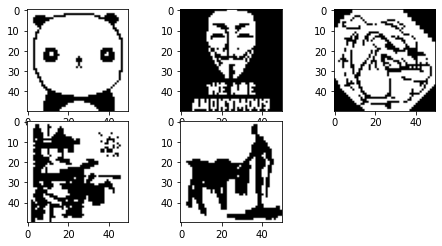

In [6]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

In [7]:
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(P):
            w[i, j] += (epsilon[p, i]*epsilon[p, j]).sum()
        if i==j:
            w[i, j] = 0
w /= N
w

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [05:12<00:00,  8.01it/s]


array([[0.   , 0.002, 0.002, ..., 0.002, 0.002, 0.002],
       [0.002, 0.   , 0.002, ..., 0.002, 0.002, 0.002],
       [0.002, 0.002, 0.   , ..., 0.002, 0.002, 0.002],
       ...,
       [0.002, 0.002, 0.002, ..., 0.   , 0.002, 0.002],
       [0.002, 0.002, 0.002, ..., 0.002, 0.   , 0.002],
       [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.   ]])

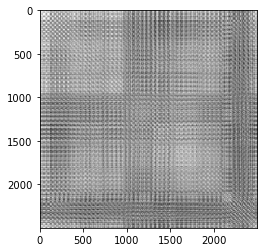

In [8]:
w.shape
plt.imshow(w, cmap='gray')

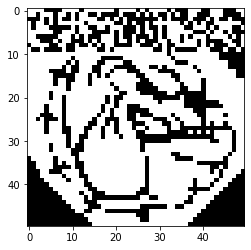

In [9]:
random_pattern = np.random.randint(P)
test_array = np.copy(epsilon[random_pattern])
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
test_array[0:0+NO_OF_BITS_TO_CHANGE] = random_pattern_test
plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:12<00:00, 14.74s/it]


array([[ 797., 1446.,  284., 1143., 1073.],
       [ 917., 1350.,  104., 1193., 1141.],
       [ 954., 1299.,   39., 1208., 1166.],
       [ 968., 1291.,   13., 1210., 1180.],
       [ 971., 1286.,    6., 1215., 1181.],
       [ 971., 1284.,    2., 1215., 1183.],
       [ 973., 1284.,    0., 1217., 1185.],
       [ 973., 1284.,    0., 1217., 1185.],
       [ 973., 1284.,    0., 1217., 1185.]])

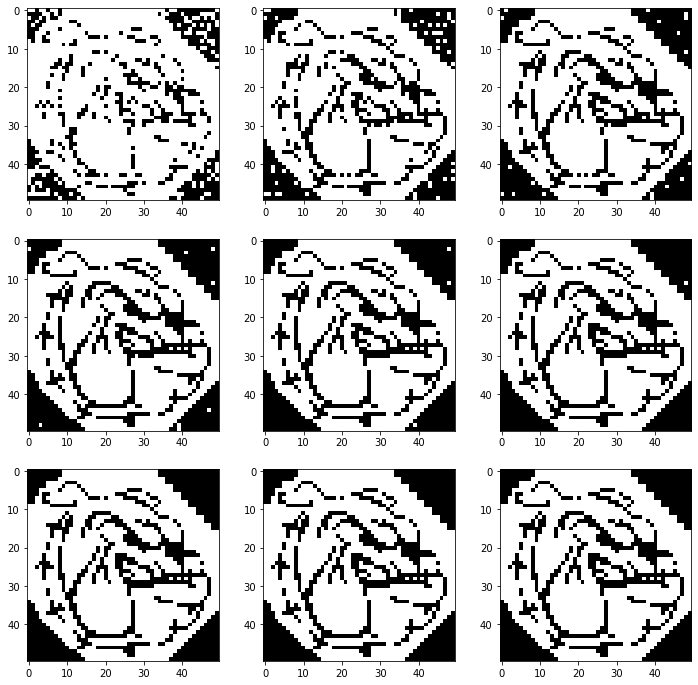

In [10]:
hamming_distance = np.zeros((NO_OF_ITERATIONS, P))
fig = plt.figure(figsize = (12, 12))
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)
    for i in range(P):
        hamming_distance[iteration, i] = ((epsilon - test_array)[i]!=0).sum()
    plt.subplot(3, 3,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')
    
hamming_distance

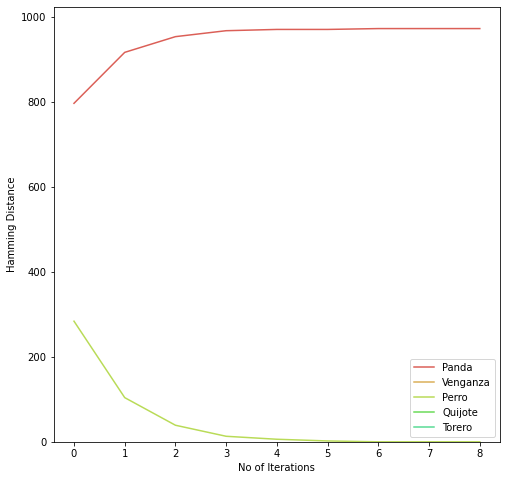

In [11]:
fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 1024])
#plt.legend(['Panda', 'Venganza', 'Perro', 'Paloma', 'Quijote', 'Torero'],  loc='best')
plt.legend(['Panda', 'Venganza', 'Perro', 'Quijote', 'Torero'],  loc='best')
#plt.legend(['Panda','Quijote', 'Torero'],  loc='best')
plt.show()